In [3]:
import os
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
# Change the working directory to the parent directory to allow importing the segadb package.
notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..', '..'))
sys.path.append(parent_dir)

from sega_learn.neural_networks import *

# print(f"Working directory: {notebook_dir}")
# print(f"Parent directory: {parent_dir}")

In [5]:
def time_function(func, num_repeats, *args, **kwargs):
    times = []
    for _ in range(num_repeats):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        times.append(end_time - start_time)
    avg_time = np.mean(times)
    stddev_time = np.std(times)
    return avg_time, stddev_time, result

In [6]:
from test_nn import *
from test_nn_cupy import *

## Run Time Comparison of Neural Network Implementations
### Comparison of CPU (numpy) and CPU (cupy) implementations

In [10]:
# Constants for testing
num_repeats = 10

# Neural Network Timing
nnt_layer_sizes_multiplier = 5
nnt_dataset_size = 100_000

# Optimizer Timing
optt_layer_sizes_multiplier = 25

# Loss Function Timing
losst_layer_sizes_multiplier = 10
losst_dataset_size = 1_000_000

# Train Epoch Timing
epocht_layer_sizes_multiplier = 1
epocht_dataset_sizes = [1_000, 5_000, 10_000, 50_000, 100_000]

#### Neural Network Timing

In [12]:
print("Base NN Timing Implementation:")
nn_base = time_nn_base(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

print("\n\nCuPy NN Timing Implementation:")
nn_cupy = time_nn_cupy(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

Base NN Timing Implementation:
  --Plateau learning rate scheduler triggered, reducing learning rate
  --Decaying learning rate from 0.01 to 0.001

Timing results for NeuralNetwork methods (averaged over 10 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 100,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std Dev (s)
forward             : 0.818831 seconds ± 0.047088 seconds
apply_dropout       : 0.593302 seconds ± 0.017866 seconds
backward            : 0.861890 seconds ± 0.079149 seconds
calculate_loss      : 0.928378 seconds ± 0.041895 seconds
evaluate            : 0.814548 seconds ± 0.049869 seconds
train (X,y Reduced) : 1.341206 seconds ± 0.163473 seconds


CuPy NN Timing Implementation:
  --Plateau learning rate scheduler triggered, reducing learning rate
  --Decaying learning rate from 0.01 to 0.001

Timing results for NeuralNetwork methods (averaged over 10

#### Optimizer Timing

In [13]:
print("Base NN Optimizer Implementation:")
nn_optimizer_times = time_nn_optimizer(num_repeats, optt_layer_sizes_multiplier)

print("\n\nCuPy NN Optimizer Implementation:")
nn_optimizer_times_cupy = time_nn_optimizer_cupy(num_repeats, optt_layer_sizes_multiplier)

Base NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
----------------------------------------------------------------------------------------------------
Optimizer Function       : Average Time (s) ±  Std Dev (s)
Adam_initialize          : 0.027031 seconds ± 0.010151 seconds
SGD_initialize           : 0.017099 seconds ± 0.003295 seconds
Adadelta_initialize      : 0.149557 seconds ± 0.055372 seconds
----------------------------------------------------------------------
Adam_update              : 0.371733 seconds ± 0.028420 seconds
SGD_update               : 0.196968 seconds ± 0.080279 seconds
Adadelta_update          : 0.399855 seconds ± 0.035979 seconds


CuPy NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
-----------------------------------------------------------------------------------------

#### Loss Function Timing

In [14]:
print("Base NN Loss Implementation:")
nn_loss_base = time_nn_loss(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

print("\n\nCuPy NN Loss Implementation:")
nn_loss_cupy = time_nn_loss_cupy(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

Base NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 3.805494 seconds ± 1.781876 seconds
BCEWithLogitsLoss        : 0.047373 seconds ± 0.008202 seconds


CuPy NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 1.052702 seconds ± 0.518422 seconds
BCEWithLogitsLoss        : 0.009800 seconds ± 0.015743 seconds


#### Epoch Timings

In [15]:
print("Base NN Single Epoch Implementation:")
nn_epoch_base = time_nn_epoch(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

print("\n\nCuPy NN Single Epoch Implementation:")
nn_epoch_cupy = time_nn_epoch_cupy(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

Base NN Single Epoch Implementation:
Training on dataset size 1,000 samples
  --Plateau learning rate scheduler triggered, reducing learning rate
  --Decaying learning rate from 0.01 to 0.001
Training on dataset size 5,000 samples
  --Plateau learning rate scheduler triggered, reducing learning rate
  --Decaying learning rate from 0.01 to 0.001
Training on dataset size 10,000 samples
  --Plateau learning rate scheduler triggered, reducing learning rate
  --Decaying learning rate from 0.01 to 0.001
Training on dataset size 50,000 samples
  --Plateau learning rate scheduler triggered, reducing learning rate
  --Decaying learning rate from 0.01 to 0.001
Training on dataset size 100,000 samples
  --Plateau learning rate scheduler triggered, reducing learning rate
  --Decaying learning rate from 0.01 to 0.001


CuPy NN Single Epoch Implementation:
Training on dataset size 1,000 samples
  --Plateau learning rate scheduler triggered, reducing learning rate
  --Decaying learning rate from 0.01

## Visualization of Neural Network Timing Results

### Setup

In [16]:
# Combine results from CPU and CuPy
def combine_results(*results_dicts):
    combined_results = []
    for results_dict in results_dicts:
        for func_name, (avg_time, stddev_time) in results_dict.items():
            combined_results.append([func_name, avg_time, stddev_time])
    
    # Create DataFrame from collected results
    results = pd.DataFrame(combined_results, columns=["Function", "Average Time (s)", "Std Dev (s)"])
    
    return results

In [17]:
cpu_results = combine_results(nn_base, nn_optimizer_times, nn_loss_base)
cupy_results = combine_results(nn_cupy, nn_optimizer_times_cupy, nn_loss_cupy)

In [18]:
# Add a column to distinguish CPU and CuPy results
cpu_results["Implementation"] = "CPU"
cupy_results["Implementation"] = "CuPy"

# Combine the datasets
results = pd.concat([cpu_results, cupy_results])
results

,Function,Average Time (s),Std Dev (s),Implementation
0,forward,0.818831,0.047088,CPU
1,apply_dropout,0.593302,0.017866,CPU
2,backward,0.861890,0.079149,CPU
3,calculate_loss,0.928378,0.041895,CPU
4,evaluate,0.814548,0.049869,CPU
5,train,1.341206,0.163473,CPU
6,Adam_initialize,0.027031,0.010151,CPU
7,Adam_update,0.371733,0.028420,CPU
8,SGD_initialize,0.017099,0.003295,CPU
9,SGD_update,0.196968,0.080279,CPU


In [19]:
# Create a pivot table for easier comparison
pivot_results = results.pivot(index='Function', columns='Implementation', values='Average Time (s)').reset_index()
pivot_results['Speedup (%)'] = ((pivot_results['CPU'] - pivot_results['CuPy']) / pivot_results['CPU'] * 100)

# Sort functions by CPU execution time for better readability
pivot_results = pivot_results.sort_values('CPU', ascending=False)
pivot_results

Implementation,Function,CPU,CuPy,Speedup (%)
5,CrossEntropyLoss,3.805494,1.052702,72.337311
13,train,1.341206,1.058804,21.055822
10,calculate_loss,0.928378,0.598883,35.491455
9,backward,0.861890,0.002300,99.733122
12,forward,0.818831,0.228479,72.096960
11,evaluate,0.814548,0.257718,68.360671
8,apply_dropout,0.593302,0.230409,61.164920
1,Adadelta_update,0.399855,0.016001,95.998216
3,Adam_update,0.371733,0.017399,95.319363
7,SGD_update,0.196968,0.010000,94.923041


In [20]:
_nn_epoch_base = pd.DataFrame(nn_epoch_base, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_base["Implementation"] = "CPU"

_nn_epoch_cupy = pd.DataFrame(nn_epoch_cupy, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_cupy["Implementation"] = "CuPy"

# Combine the datasets
epoch_results = pd.concat([_nn_epoch_base, _nn_epoch_cupy])
epoch_results

,Dataset Size,Average Time (s),Std Dev (s),Implementation
0,1000,0.025700,0.034163,CPU
1,5000,0.076992,0.005936,CPU
2,10000,0.147214,0.008878,CPU
3,50000,0.744648,0.031049,CPU
4,100000,1.516254,0.145804,CPU
0,1000,0.119077,0.038468,CuPy
1,5000,0.443441,0.038187,CuPy
2,10000,0.919901,0.115376,CuPy
3,50000,4.303050,0.338421,CuPy
4,100000,8.223317,0.198132,CuPy


In [21]:
# Set Seaborn style with improved readability
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['font.family'] = 'sans-serif'

### Visualizations

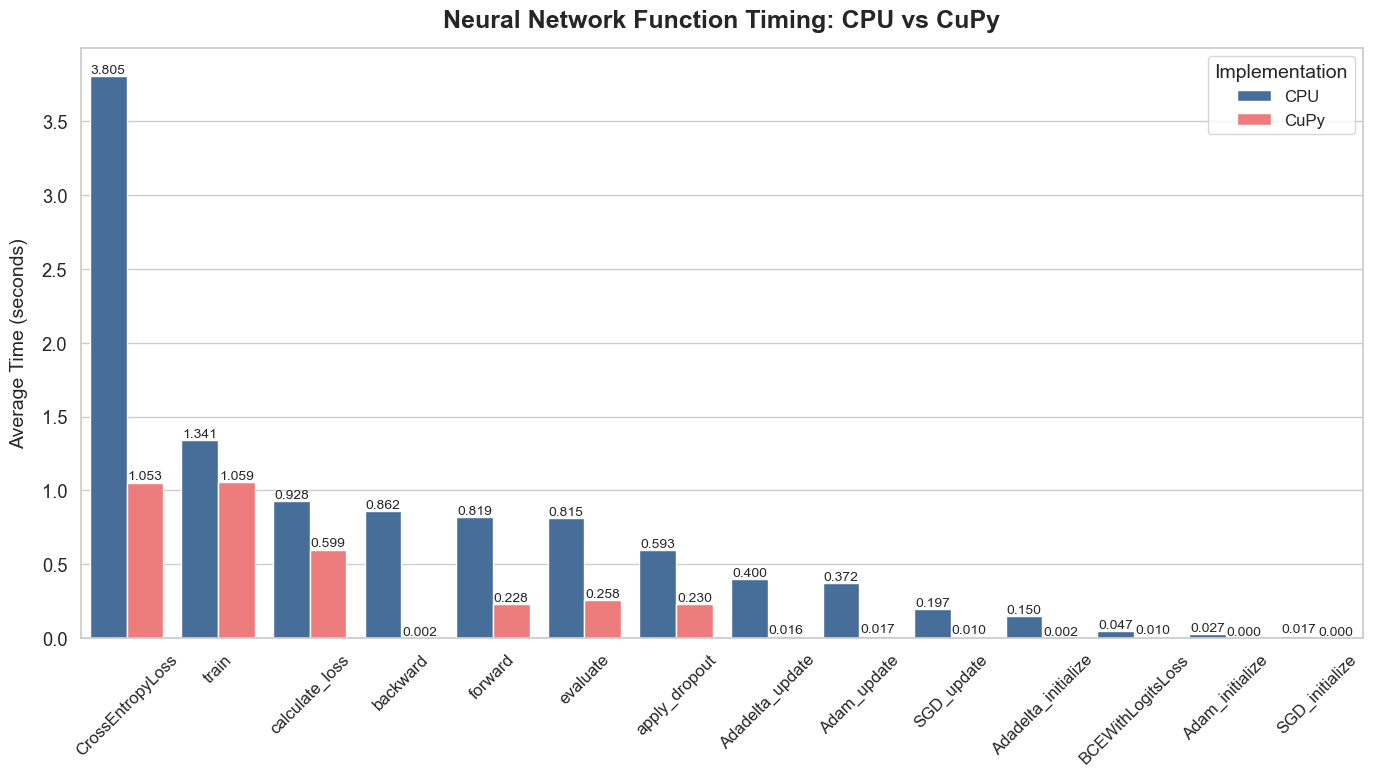

In [22]:
# First plot: Timing comparison
plt.figure(figsize=(14, 8))
melted_data = pd.melt(pivot_results, id_vars=['Function'], value_vars=['CPU', 'CuPy'])
melted_data.rename(columns={'variable': 'Implementation'}, inplace=True)

sns.barplot(x='Function', y='value', hue='Implementation', 
            data=melted_data,
            palette=['#3A6EA5', '#FF6B6B'])

plt.title('Neural Network Function Timing: CPU vs CuPy', fontsize=18, fontweight='bold')
plt.ylabel('Average Time (seconds)', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Implementation', fontsize=12, title_fontsize=14)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f', fontsize=10)

plt.tight_layout()
plt.show()

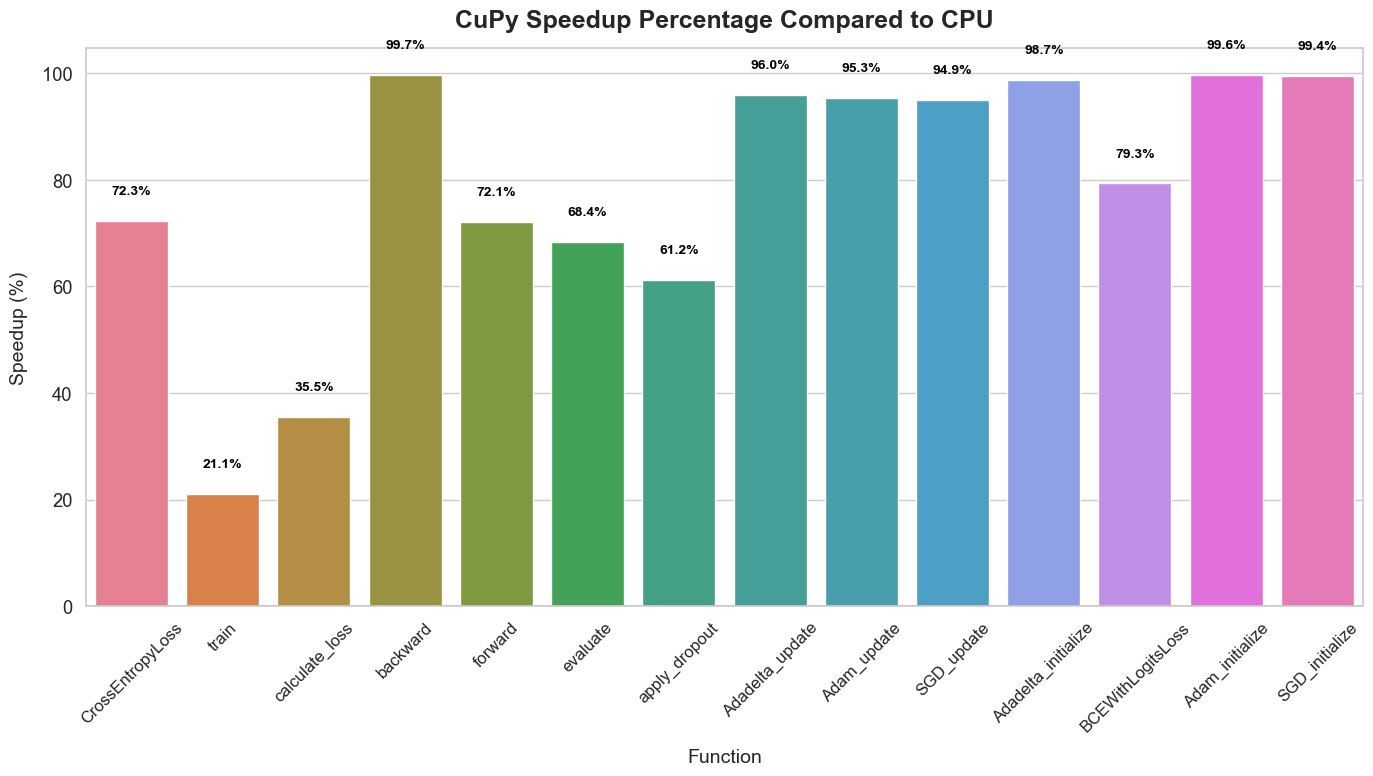

In [23]:
# Second plot: Speedup percentage
pivot_results.sort_values('Speedup (%)', ascending=False)

plt.figure(figsize=(14, 8))
speedup_bars = sns.barplot(x='Function', y='Speedup (%)', data=pivot_results, hue='Function')
plt.title('CuPy Speedup Percentage Compared to CPU', fontsize=18, fontweight='bold')
plt.ylabel('Speedup (%)', fontsize=14)
plt.xlabel('Function', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)

# Add value labels on speedup bars
for i, v in enumerate(pivot_results['Speedup (%)']):
    plt.text(i, max(v + 5, 5) if v > 0 else v - 15, 
             f"{v:.1f}%", ha='center', fontsize=10, 
             fontweight='bold', color='black')

# Highlight negative speedups (where CPU is faster)
for i, v in enumerate(pivot_results['Speedup (%)']):
    if v < 0:
        speedup_bars.patches[i].set_facecolor('#FF7F7F')  # Light red for negative speedup

plt.tight_layout()
plt.show()

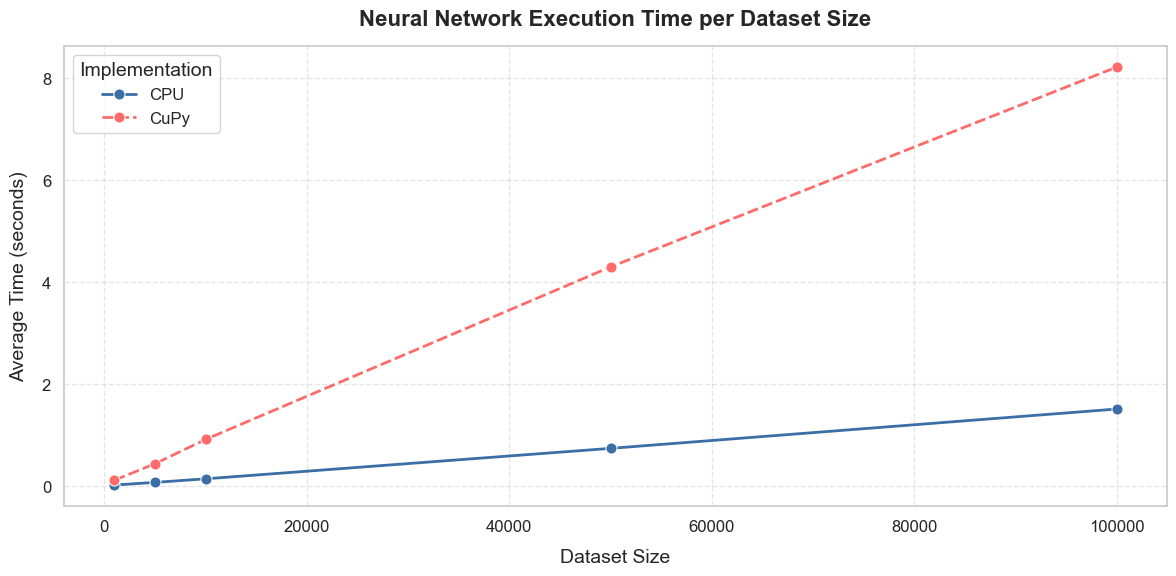

In [24]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=epoch_results, x="Dataset Size", y="Average Time (s)", 
             hue="Implementation", marker="o", 
             palette=["#3A6EA5", "#FF6B6B"], 
             linewidth=2, markersize=8, 
             err_style="bars", err_kws={'capsize': 4}, 
             style="Implementation")

# Add title and labels
plt.title("Neural Network Execution Time per Dataset Size", fontsize=16, fontweight="bold")
plt.xlabel("Dataset Size", fontsize=14)
plt.ylabel("Average Time (seconds)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Implementation", fontsize=12, title_fontsize=14)

# Show the plot
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
